# Machine Learning - Prof: Lívia Almada

* **Equipe:** Henricky de Lima Monteiro (475075) & Danilo Carneiro Teles (470444)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

Este trabalho tem por objetivo analisar quais eventos influênciam no resultado de uma partida rankeado do jogo League of Legends(LOL), jogo do estilo MOBA onde duas equipes de 5 campeões que se enfrentam em 3 rotas e um intermédio delas, chamada *jungle*. Uma partida de Lol tem por objetivo destruir torres para acessar a base e destruir o centro da mesma (Nexus). Durante o desenvolvimento deste trabalho nos deparamos com as seguintes dúvida:

* **Pré-game:** Existem fatores durante a seleção de campeões que influênciam na vítória? (como os campeões selecionados, bans e feitiços de invocador)
* **in-game:** Fatores como quem pegou "first_blood", ou o time que pegou mais *kills* influencia na vitória? (independente dos campeões selecionados) 
* **in-game geral:** Se todos os fatores influênciam na vitória?

Nosso dataset tem uma série de eventos que ocorreram na seleção e na partida e que time ganhou, ou seja, temos um problema de classificação supervisionada. Vamos utilizar 6 modelos para tentar identificar o que melhor se aplica ao problema.


* KNN
* Decision Tree
* Random Forest
* Regrassão Logistica
* Redes Neurais
* Gradient Boosting

## Lendo dados do DataSet

In [48]:
# Leitura dos Dataset
df = pd.read_csv("games.csv")
df = df.fillna(0)
df.shape

(51490, 61)

In [49]:
# Tipos de entradas
labels_desejadas_pre = [
   'winner', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1',
    't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
    't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't2_champ1id', 't2_champ1_sum1', 
    't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1','t2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 
    't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1','t2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 
    't2_champ5_sum2'
]

labels_desejadas_in = [
    'winner','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald', 'gameDuration'
]

labels_desejadas_in_geral = [
    'winner','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald',
    't1_champ1id','t1_champ1_sum1','t1_champ1_sum2','t1_champ2id','t1_champ2_sum1','t1_champ2_sum2',
    't1_champ3id','t1_champ3_sum1','t1_champ3_sum2','t1_champ4id','t1_champ4_sum1','t1_champ4_sum2',
    't1_champ5id','t1_champ5_sum1','t1_champ5_sum2','t1_baronKills',
    't1_dragonKills','t1_riftHeraldKills','t2_champ1id','t2_champ1_sum1','t2_champ1_sum2','t2_champ2id',
    't2_champ2_sum1','t2_champ2_sum2','t2_champ3id','t2_champ3_sum1','t2_champ3_sum2','t2_champ4id',
    't2_champ4_sum1','t2_champ4_sum2','t2_champ5id','t2_champ5_sum1','t2_champ5_sum2',
    't2_baronKills','t2_dragonKills','t2_riftHeraldKills','gameDuration'
]

In [50]:
# #remoção das colunas desnecessárias
# df = df.drop(['gameId', 'creationTime', 'seasonId'], axis=1)
# # df = df[labels_desejadas]

df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


## Treinamento de Modelos

Vamos criar uma função para gerar a separação de data e teste

In [51]:
def GenerateTrainTest(data):
    df = data.copy()
    #Pegando a coluna a ser analisada(Quem venceu)
    x = df.drop(['winner'], axis=1).values 
    y = df['winner']
    # Separando Teste(20) e Treino(80)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

## Modelos

### Validação Cruzada

A validação cruzada é uma técnica que consiste em dividir o conjunto de dados em partes menores chamadas folds, onde cada fold é usado como conjunto de teste uma vez, enquanto os demais folds são usados como conjunto de treinamento. O parâmetro "cv" determina quantas vezes essa divisão em folds será repetida e controla a divisão dos dados em folds afetando a quantidade de vezes que o modelo será treinado e testado. Um valor maior de "cv" resulta em uma estimativa mais robusta do desempenho, mas também aumenta o tempo de processamento.

Existem dois métodos:

* **GridSearchCV:** Serve para encontrar os melhores parâmetros.
* **cross_val_score:** Serve para calcular o desempenho médio.

Utilizando-os podemos melhorar os resultados dos modelos.

In [52]:
def get_best_params(model_name, model, X_train, y_train, param_grid):
    # Definir os parâmetros a serem ajustados
        # knn exemple: param_grid = {'n_neighbors': [3, 5, 7, 9]}
    # Criar o objeto GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5)

    # Realizar a busca dos melhores parâmetros
    grid_search.fit(X_train, y_train)
    # Obter os melhores parâmetros encontrados
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    print(f'{model_name} get_best_params')
    print("\tMelhores parâmetros:", best_params)
    print("\tMelhor acurácia:", best_accuracy)
    return best_params

In [53]:
def evaluate_performance(model_name, model,X_train, y_train):
    # Criar o objeto do modelo KNN com os parâmetros desejados
    knn = KNeighborsClassifier(n_neighbors=5)

    # Calcular o desempenho médio usando cross_val_score
    scores = cross_val_score(knn, X_train, y_train, cv=5)

    # Calcular a pontuação média
    mean_score = scores.mean()

    return mean_score

In [54]:
def model_tran(model_name, model,X_train, y_train, param_grid):

    # Criar o objeto do modelo KNN
    model = KNeighborsClassifier()

    # Obter os melhores parâmetros para o KNN
    best_params = get_best_params('KNN', model, X_train, y_train, param_grid)

    # Configurar o modelo KNN com os melhores parâmetros
    model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])

    # Avaliar o desempenho do modelo KNN
    performance = evaluate_performance('KNN', model, X_train, y_train)

    print("Desempenho médio:", performance)

### KNN

O algoritmo KNN é um método de aprendizado supervisionado usado para classificação e regressão. Ele determina a classe ou o valor de um ponto de dados com base nas classes ou nos valores dos pontos vizinhos mais próximos. O KNN é simples e intuitivo, onde a previsão é feita com base na maioria das classes dos vizinhos mais próximos. É adequado para problemas em que a estrutura do conjunto de dados não é linear e não paramétrico.

In [55]:
def KNNTrain(X_train, y_train , param_grid):
    # Criar o objeto do modelo KNN
    model = KNeighborsClassifier()
    # Obter os melhores parâmetros para o KNN
    best_params = get_best_params('KNN', model, X_train, y_train, param_grid)
    # Configurar o modelo KNN com os melhores parâmetros
    model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
    # Avaliar o desempenho do modelo KNN
    performance = evaluate_performance('KNN', model, X_train, y_train)
    print("\tDesempenho médio:", performance)
    return performance


### Árvore de Decisão

A árvore de decisão é um algoritmo de aprendizado supervisionado que toma decisões em forma de uma estrutura em forma de árvore. Cada nó interno representa um teste em um atributo, cada ramo representa o resultado do teste e cada folha representa a classe ou o valor de destino. A árvore é construída recursivamente, dividindo o conjunto de dados com base em atributos que melhor separam as classes ou reduzem a impureza. As árvores de decisão são fáceis de interpretar e podem lidar com dados numéricos e categóricos.

In [56]:
def DecisionTreeTrain(X_train, y_train, param_grid):
    # Inicializa o classificador de árvore de decisão
    # Criar o objeto do modelo
    model = DecisionTreeClassifier()
    # Obter os melhores parâmetros
    best_params = get_best_params('DecisionTree', model, X_train, y_train, param_grid)
    # Configurar o modelo com os melhores parâmetros
    model = KNeighborsClassifier(best_params['max_depth'])
    # Avaliar o desempenho do modelo
    performance = evaluate_performance('DecisionTree', model, X_train, y_train)
    print("\tDesempenho médio:", performance)
    return best_params, performance

### Random Florest
A floresta aleatória é um conjunto de árvores de decisão. Cada árvore é construída em um subconjunto aleatório de atributos e uma amostra aleatória do conjunto de dados. Durante a previsão, as árvores individuais são consultadas e suas previsões são combinadas por votação (classificação) ou média (regressão). As florestas aleatórias são eficazes para lidar com overfitting, lidar com dados desbalanceados e lidar com uma grande quantidade de recursos.

In [57]:
def RandomForestTrain(X_train, y_train, param_grid):
    # Inicializa o classificador de árvore de decisão
    # Criar o objeto do modelo
    model = RandomForestClassifier()
    # Obter os melhores parâmetros
    best_params = get_best_params('RandomForest', model, X_train, y_train, param_grid)
    # Configurar o modelo com os melhores parâmetros
    model = RandomForestClassifier(**best_params)
    # Avaliar o desempenho do modelo
    performance = evaluate_performance('RandomForest', model, X_train, y_train)
    print("\tDesempenho médio:", performance)
    return best_params, performance

### Regreção Logistica

A regressão logística é um modelo estatístico usado para modelar a probabilidade de uma determinada classe ou evento ocorrer com base em variáveis independentes. É amplamente utilizado para problemas de classificação binária, onde a saída é uma das duas classes possíveis. A regressão logística utiliza uma função logística para mapear a soma ponderada das variáveis independentes para uma probabilidade entre 0 e 1. É interpretável e pode ser estendido para problemas de classificação multiclasse.

In [58]:
def LogisticRegressionTrain(X_train, y_train, param_grid):
    # Inicializa o classificador de árvore de decisão
    # Criar o objeto do modelo
    model = LogisticRegression()
    # Obter os melhores parâmetros
    best_params = get_best_params('LogisticRegression', model, X_train, y_train, param_grid)
    # Configurar o modelo com os melhores parâmetros
    model = LogisticRegression(**best_params)
    # Avaliar o desempenho do modelo
    performance = evaluate_performance('LogisticRegression', model, X_train, y_train)
    print("\tDesempenho médio:", performance)
    return best_params, performance

### Gradient Boosting

O Gradient Boosting é um método de aprendizado de máquina que combina várias árvores de decisão para criar um modelo forte. Ele treina sequencialmente árvores adicionais para corrigir os erros cometidos pelas árvores anteriores. Ao combinar várias árvores fracas, o Gradient Boosting é capaz de construir um modelo poderoso para problemas de regressão e classificação. Ele utiliza o gradiente descendente para ajustar os pesos das árvores e minimizar a função de perda. O Gradient Boosting é conhecido por sua alta precisão e é amplamente utilizado em competições de ciência de dados e problemas do mundo real.

In [65]:
# Definir os parâmetros do modelo
xgBoostParams = {
    'objective': 'binary:logistic',  # Para classificação binária
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'n_estimators': 100
}
def XGBoostTrain(X_train, y_train, param_grid):
    # Codificar os rótulos usando LabelEncoder
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    # Inicializa o classificador de Gradient Boosting
    model = xgb.XGBClassifier()
    # Obter os melhores parâmetros
    best_params = get_best_params('GradientBoosting', model, X_train, y_train_encoded, param_grid)
    # Configurar o modelo com os melhores parâmetros
    model = xgb.XGBClassifier(**best_params)
    # Avaliar o desempenho do modelo
    performance = evaluate_performance('GradientBoosting', model, X_train, y_train_encoded)
    print("\tDesempenho médio:", performance)
    return best_params, performance

### Neural Network

As redes neurais são modelos de aprendizado de máquina inspirados pelo funcionamento do cérebro humano. Elas consistem em camadas de neurônios interconectados que realizam operações matemáticas para aprender padrões complexos nos dados. As redes neurais são altamente flexíveis e podem lidar com problemas de classificação, regressão e até mesmo tarefas mais avançadas, como reconhecimento de imagem e processamento de linguagem natural. Elas são treinadas usando algoritmos de otimização, como o gradiente descendente, para ajustar os pesos das conexões entre os neurônios.

In [66]:
def create_model(hidden_layer_sizes=(64,), activation='relu', optimizer='adam'):
    model = tf.keras.models.Sequential()
    layers = tf.keras.layers 
    for i, units in enumerate(hidden_layer_sizes):
        if i == 0:
            model.add(layers.Dense(units, activation=activation, input_shape=(input_dim,)))
        else:
            model.add(layers.Dense(units, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model
def NeuralNetworkTrain(X_train, y_train, param_grid):
    model = tf.keras.models.Sequential(build_fn=create_model)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    print("Melhores parâmetros:", best_params)
    print("Melhor acurácia:", best_accuracy)

    return best_params, best_accuracy

## Aplicação dos modelos

Agora vamos associar os dataset para cada modelo

### KNN

In [71]:
models = {
    # 'KNN': {'model': KNNTrain, 'param_grid': {'n_neighbors': [3, 5, 7, 9]}},
    'DecisionTree': {'model': DecisionTreeTrain, 'param_grid': {'max_depth': [None, 5, 10, 20]}},
    # 'RandomForest': {'model': RandomForestTrain, 'param_grid': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}},
    # 'LogisticRegression': {'model': LogisticRegressionTrain, 'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}},
    # 'NeuralNetwork': {'model': NeuralNetworkTrain, 'param_grid': {'hidden_layer_sizes': [(100,), (100, 50), (50, 50)], 'activation': ['relu', 'sigmoid']}},
    # 'GradientBoost': {'model': XGBoostTrain, 'param_grid': {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 200, 300]}},
}
def ApplyModel(df, df_name):
    X_train, X_test, y_train, y_test = GenerateTrainTest(df)
    model_names = []
    model_accuracies = []
    knn_best_k = 0
    for name, params in models.items():
        model = params['model']
        param_grid = params['param_grid']
        model_names.append(name)
        print(f'trains {name} model ...')
        # if(name == "KNN"):
        model(X_train, y_train , param_grid)

        # KNN
        # if(name == 'KNN'):
        #     kList = np.arange(1,22,2)
        #     accuracies = []
        #     for k in kList:
        #         accuracy =  model(X_train, X_test, y_train, y_test, k)
        #         accuracies.append(accuracy)
        #     best_accuracy_index = accuracies.index(max(accuracies))
        #     model_accuracies.append(accuracies[best_accuracy_index])
        #     knn_best_k = kList[best_accuracy_index]
        #     print(f'Best k: {knn_best_k}')
        #     plt.plot(kList, accuracies, 'o')
        #     plt.title(df_name)
        #     plt.show()
        # elif (name == 'Neural Network'):
        #     accuracy = model(X_train, X_test, y_train, y_test, df)
        #     model_accuracies.append(accuracy)
        # # Redes Neurais
        # else:
        #     accuracy =model(X_train, X_test, y_train, y_test)
        #     model_accuracies.append(accuracy)
    # return zip(model_names, model_accuracies)

def LogResults(result, df_name):
    format = lambda name, accuracy: f"\tBy model '{name}' -> accuracy: {accuracy*100}"
    print(f':: For {df_name} ::')
    models = []
    accuracies = []
    for (name, accuracy) in result:
        models.append(name)
        accuracies.append(accuracy)
        print(format(name,accuracy))
    print(models, accuracies)
    plt.bar(models, accuracies)
    # Personalização do gráfico
    plt.xlabel('Modelos')
    plt.ylabel('Acuráci')
    plt.title('Acurácia dos Modelos')
    plt.show()
##    fig, ax = plt.subplots(figsize=(2, 12))

In [44]:
df_pre = df[labels_desejadas_pre]

df_pre_result=ApplyModel(df_pre, 'Pre game')

<function KNNTrain at 0x000002BB8DD376A0>
trains KNN model ...


KeyboardInterrupt: 

In [72]:
df_in = df[labels_desejadas_in]

df_in_result = ApplyModel(df_in, 'In game')

trains GradientBoost model ...
GradientBoosting get_best_params
	Melhores parâmetros: {'learning_rate': 0.01, 'n_estimators': 300}
	Melhor acurácia: 0.8980384183479935
	Desempenho médio: 0.8226112573207072


In [27]:
df_in_g = df[labels_desejadas_in_geral]

df_in_g_result =ApplyModel(df_in_g, 'In game Geral')

<function KNNTrain at 0x000002BB8DD57BA0>
trains KNN model ...
KNN get_best_params
	Melhores parâmetros: {'n_neighbors': 5}
	Melhor acurácia: 0.5078655419405942
Desempenho médio: 0.5078655419405942


## Resultados

:: For Pre game ::
	By model 'KNN' -> accuracy: 51.15556418722081
	By model 'Decision Tree' -> accuracy: 52.02952029520295
	By model 'Random Florest' -> accuracy: 52.00038842493689
	By model 'Logistic Regression' -> accuracy: 52.505340842882106
	By model 'Gradient Boosting' -> accuracy: 53.146241988735675
	By model 'Neural Network' -> accuracy: 50.79627112060594
['KNN', 'Decision Tree', 'Random Florest', 'Logistic Regression', 'Gradient Boosting', 'Neural Network'] [0.5115556418722081, 0.5202952029520295, 0.5200038842493688, 0.5250534084288211, 0.5314624198873568, 0.5079627112060594]


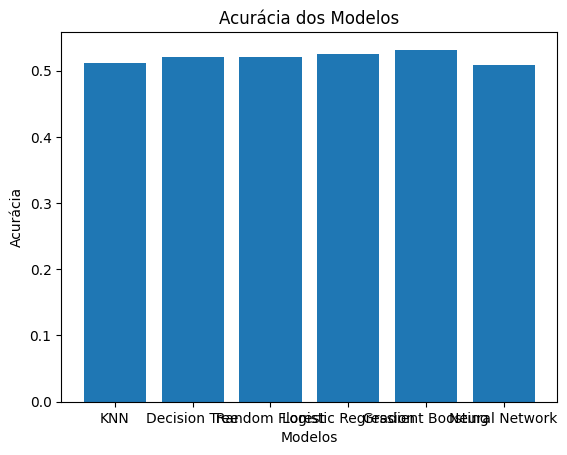

:: For In game ::
	By model 'KNN' -> accuracy: 83.95805010681686
	By model 'Decision Tree' -> accuracy: 86.12351912992814
	By model 'Random Florest' -> accuracy: 86.45368032627695
	By model 'Logistic Regression' -> accuracy: 81.97708292872402
	By model 'Gradient Boosting' -> accuracy: 90.02718974558167
	By model 'Neural Network' -> accuracy: 50.79627112060594
['KNN', 'Decision Tree', 'Random Florest', 'Logistic Regression', 'Gradient Boosting', 'Neural Network'] [0.8395805010681686, 0.8612351912992814, 0.8645368032627695, 0.8197708292872402, 0.9002718974558167, 0.5079627112060594]


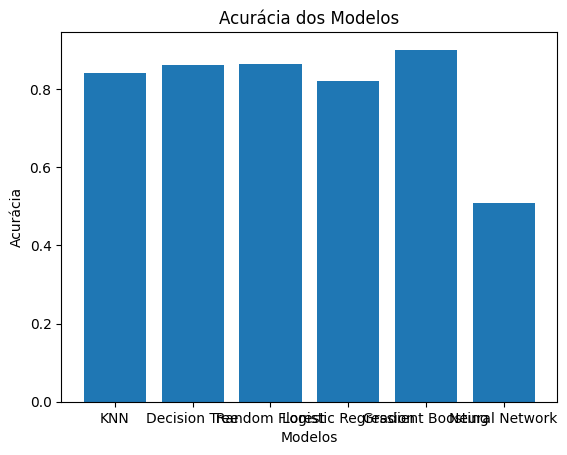

:: For In game Geral ::
	By model 'KNN' -> accuracy: 51.19440668090891
	By model 'Decision Tree' -> accuracy: 88.46377937463585
	By model 'Random Florest' -> accuracy: 91.65857448048165
	By model 'Logistic Regression' -> accuracy: 81.34589240629249
	By model 'Gradient Boosting' -> accuracy: 91.36725577782093
	By model 'Neural Network' -> accuracy: 50.79627112060594
['KNN', 'Decision Tree', 'Random Florest', 'Logistic Regression', 'Gradient Boosting', 'Neural Network'] [0.5119440668090891, 0.8846377937463585, 0.9165857448048165, 0.8134589240629249, 0.9136725577782093, 0.5079627112060594]


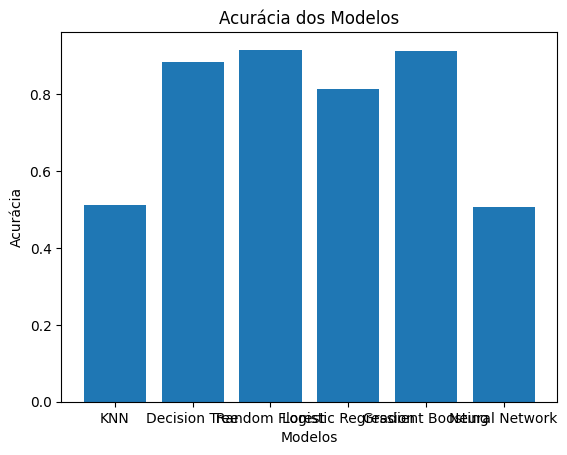

In [ ]:
LogResults(df_pre_result, 'Pre game')
LogResults(df_in_result, 'In game')
LogResults(df_in_g_result, 'In game Geral')
